- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 1

- Leia o texto em https://www.kaggle.com/code/evertonsilva/data-wrangling-cleaning e sintetize os principais passos de preparação de dados para aprendizado de máquina.Compare-os como os passos apresentados neste capítulo.


**RESPOSTA:**


O dataset utilizado no processo de preparação de dados é uma coleção de registros relacionados a questões de concursos, com o objetivo de prever se o usuário irá responder corretamente ou não uma questão de múltiplica escolha. Este problema é típico de classificação binária, onde o modelo deve aprender a distinguir entre dois possíveis resultados: “acertou” ou “errou”.

O primeiro passo no processo de preparação foi a importação dos dados de treino e teste. Os arquivos CSV foram carregados e, em seguida, combinados em um único conjunto de dados. Esse procedimento permitiu uma análise mais coesa, já que as características dos dados de treino e teste são analisadas de maneira unificada.

A etapa seguinte envolveu a verificação das colunas e suas respectivas tipagens. Este é um passo importante, pois garante que todos os dados estão no formato adequado para a análise subsequente. Erros na tipagem podem levar a problemas durante o treinamento do modelo, por isso, essa verificação é feita logo no início do processo.

Procedeu-se com o tratamento de dados faltantes. Foi realizada uma contagem e cálculo da porcentagem de valores ausentes em cada coluna. Colunas com uma ausência muito alta, próximo a 100%, foram eliminadas, pois não adicionariam valor significativo ao modelo e poderiam até introduzir ruído.

Em seguida, houve uma padronização dos nomes dos dispositivos. Este passo envolveu a extração da marca do fabricante dos dispositivos a partir dos nomes e a padronização dessas informações.

Por fim, foi realizada uma verificação do balanceamento das classes-alvo. Esta verificação é essencial para entender a distribuição das categorias “acertou” e “errou” no dataset. Um desequilíbrio significativo poderia requerer técnicas adicionais de preparação, como o oversampling ou o undersampling, para assegurar que o modelo aprenda de forma eficaz sobre ambas as classes.

Após todas essas etapas, os dados preparados foram salvos, prontos para serem utilizados em modelos de aprendizado de máquina. O processo de preparação fez com que o dataset estivesse em com dados prontos para serem utilizados em um modelo preditivo.


---

# Exercício 2:
- Reproduzir todos os exemplos do capítulo 7 (*Exploratory Data Analysis*) conforme livro localizado [neste link](https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html)



**OBSERVAÇÃO:**

Neste exercício, notei que os exemplos já estavam todos feitos em Python e com a biblioteca altair. Para não ficar limitado a copiar e colar os scripts do livro, eu portei os códigos para realizar os gráficos em ggplot (plotnine). Vale notar que não me preocupei em deixar as cores exatamente iguais às dos exemplos, mas sim em transcrever o gráfico de modo que ele forneça exatamente as mesmas informações que os exemplos originais.

## 7.1.1 - Prerequisites

In [68]:
import pandas as pd
import altair as alt
import numpy as np
from scipy import stats
from plotnine import *

alt.data_transformers.enable('json')

import warnings

warnings.filterwarnings("ignore")

#> DataTransformerRegistry.enable('json')


In [4]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/diamonds/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds['cut'] = pd.Categorical(diamonds.cut, 
  ordered = True, 
  categories =  ["Fair", "Good", "Very Good", "Premium", "Ideal" ])

diamonds['color'] = pd.Categorical(diamonds.color, 
  ordered = True, 
  categories =  ["D", "E", "F", "G", "H", "I", "J"])


diamonds['clarity'] = pd.Categorical(diamonds.clarity, 
  ordered = True, 
  categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])


In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 7.3.1 Visualising distributions

In [15]:
chart_dat = (diamonds
              .groupby('cut')
              .agg(count = ('carat', 'size'))
              .reset_index())

# Ordenando o eixo x alfabeticamente
chart_dat['cut'] = pd.Categorical(chart_dat['cut'], 
                                  categories=sorted(chart_dat['cut'].unique()), 
                                  ordered=True)



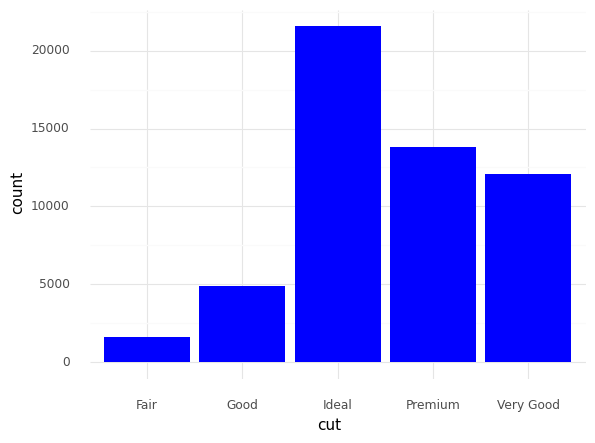

<ggplot: (812317356)>

In [21]:
chart = (
    ggplot(chart_dat, aes(x="cut", y="count"))
    + geom_bar(stat="identity", fill="blue")
    + scale_x_discrete(limits=sorted(chart_dat["cut"].unique()))
    + theme_minimal()
)
chart

**INFORMAÇÃO OBTIDA**

Um detalhe interessante que este gráfico traz é o fato de que existem muito mais diamantes com cortes bons do que ruins. Possivelmente isso acontece pelo preço que eles carregam, fazendo com que haja mais cuidado ao longo do refinamento.

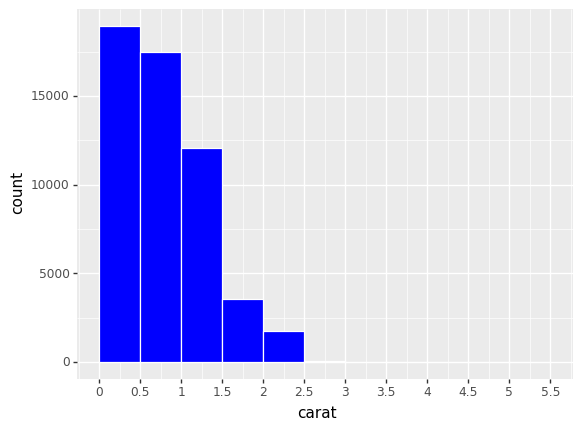

<ggplot: (811302919)>

In [37]:
plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0)
    + scale_x_continuous(limits=(0, 5.5), breaks=[x * 0.5 for x in range(12)]) 
)
plot

**INFORMAÇÃO OBTIDA**

Este histograma mostra que diamantes de quilates maiores são mais raros - o que era de se esperar, visto que este são mais caros.

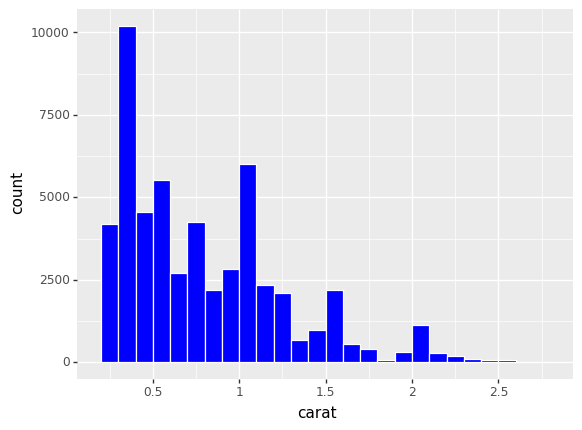

<ggplot: (811567990)>

In [71]:
smaller = diamonds.query('carat < 3')

plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.1, fill="blue", color='white', boundary=0.2)
    + scale_x_continuous(limits=(0.19, 2.8), breaks=[x * 0.5 for x in range(12)]) 
)

plot

**INFORMAÇÃO OBTIDA**

Este histograma reforça a ideia de que quilates maiores são mais raros, mas ao mesmo tempo mostra a existência de "clusters" em determinadas regiões. Percebe-se que diamantes com quilates por volta de 0.4, 1.0 e 2.0 são mais frequentes que os de faixas vizinhas.

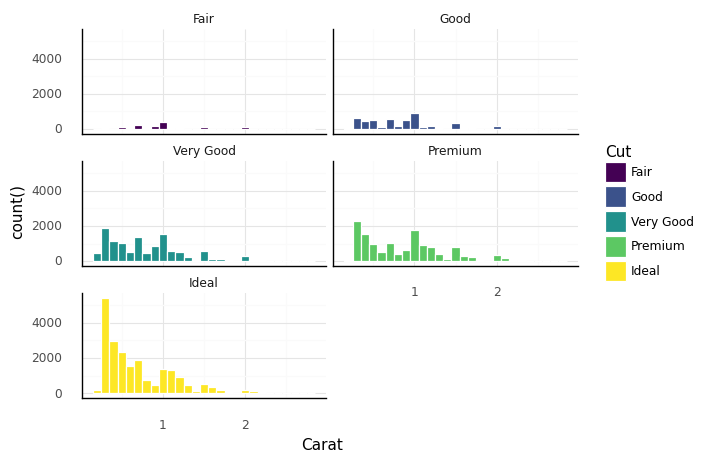

In [87]:
plot = (
    ggplot(smaller) +
    aes(x='carat', fill='cut') +
    geom_bar(stat='bin', binwidth=0.1, color='white') +
    facet_wrap('~cut', ncol=2) +
    labs(y='count()', fill='Cut', x='Carat') +
    theme_minimal() +  
    theme(
        axis_line=element_line(color='black')  
    )
)

print(plot)

## 7.3.2 Typical values

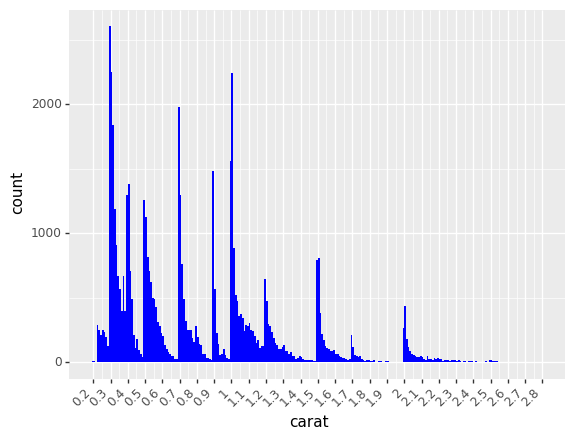

<ggplot: (813507958)>

In [102]:
smaller = diamonds.query('carat < 3')

plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.01, fill="blue", boundary=0.2)
    + scale_x_continuous(limits=(0.19, 2.8), breaks=[round(x * 0.1, 2) for x in range(2, 29)]) 
    + theme(
        axis_text_x=element_text(angle=45, hjust=1) 
    )

)

plot

**INFORMAÇÃO OBTIDA**

Este gráfico deixa ainda mais evidente a existência de "clusters" em faixas específicas de quilates.

In [104]:
# Lê o dataset faithful
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/faithful/faithful.csv"
faithful = pd.read_csv(url)
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


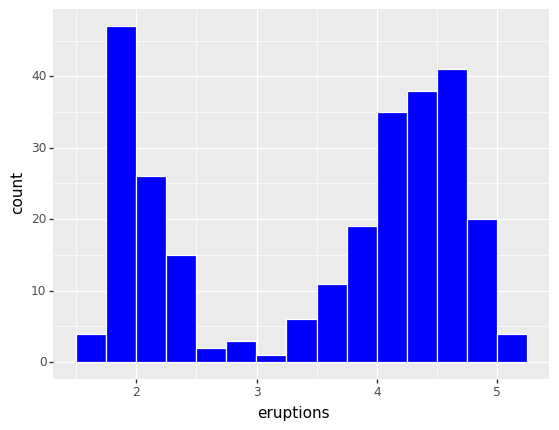

In [114]:
plot = (
    ggplot(faithful, aes(x="eruptions"))
    + geom_histogram(binwidth=0.25, fill="blue", color='white', boundary=1.499)
)

print(plot)



**INFORMAÇÃO OBTIDA**

Este histograma é composto de dois picos, indicando que ele é uma somatória de duas distribuições diferentes - números de erupções menores tendem a seguir a distribuição da esquerda e maiores, a da direita.

## 7.3.3 Unusual values

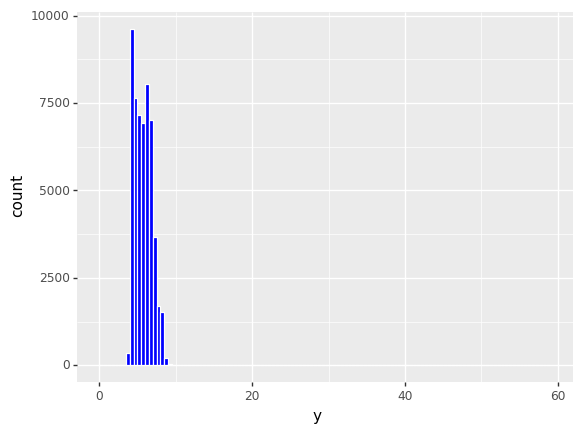

In [131]:
plot = (
    ggplot(diamonds, aes(x="y"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0.0)

)

print(plot)



**INFORMAÇÃO OBTIDA**

Este histograma mostra que os valores de y estã concentrados na região entre 4 e 10.

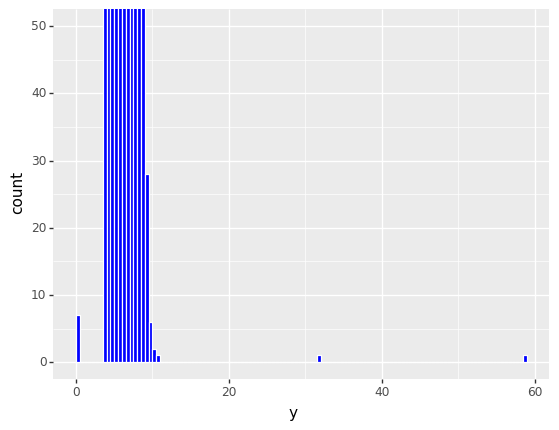

In [132]:
plot = (
    ggplot(diamonds, aes(x="y"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0.0)
    + coord_cartesian(ylim=(0, 50))  # Limita o eixo y até 50

)

print(plot)



**INFORMAÇÃO OBTIDA**

Este gráfico mostra alguns outliers por volta dos valores 0, 32 e 68, os quais não eram visíveis no gráfico anterior por conta da escala.

In [133]:
unusual = (diamonds
            .query('y < 3 | y > 20')
            .filter(['price', 'x', 'y', 'z'])
            .sort_values('y'))

unusual.head()

,price,x,y,z
11963,5139,0.0,0.0,0.0
15951,6381,0.0,0.0,0.0
24520,12800,0.0,0.0,0.0
26243,15686,0.0,0.0,0.0
27429,18034,0.0,0.0,0.0


## 7.4 Missing values


In [134]:
diamonds2 = diamonds.query('3 <= y <= 20')
diamonds2 = diamonds.assign(
        y = lambda x: np.where((x.y < 3) | (x.y > 20), np.nan, x.y)
        )
diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


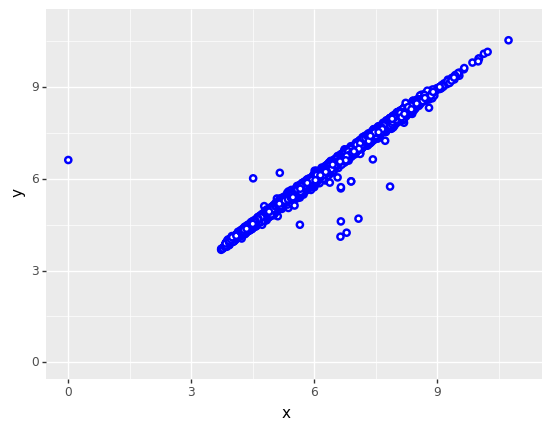

In [145]:
# Faz um scatter em que cada ponto é um circulo 

plot = (
    ggplot(diamonds2, aes(x="x", y="y"))
    + geom_point(shape="o", fill='white', color="blue", stroke=1)
    + coord_cartesian(xlim=(0, 11), ylim=(0, 11))
)

print(plot)

**INFORMAÇÃO OBTIDA**

O scatterplot mostar que existe uma correlação praticamente linear entre x e y, com alguns poucos pontos não apresentando tal comportamento.

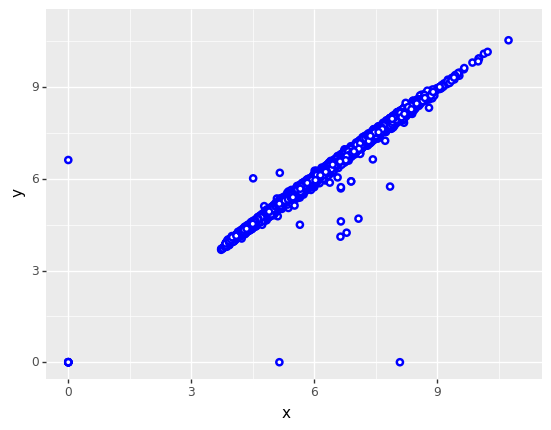

In [149]:
# Substitu os valores NaN ou None por 0
diamonds2_aux = diamonds2[['x', 'y']].fillna(0)

plot = (
    ggplot(diamonds2_aux, aes(x="x", y="y"))
    + geom_point(shape="o", fill='white', color="blue", stroke=1)
    + coord_cartesian(xlim=(0, 11), ylim=(0, 11))
)

print(plot)

**INFORMAÇÃO OBTIDA**

O gráfico acima, que trata valores None como 0, deixa evidente a presença de dados faltantes no dastaset.

In [150]:
flights_url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/flights/flights.csv"

flights = pd.read_csv(flights_url)
flights['time_hour'] = pd.to_datetime(flights.time_hour, format = "%Y-%m-%d %H:%M:%S")

pdat = flights.assign(
  cancelled = lambda x: pd.isna(x.dep_time),
  sched_hour = lambda x: x.sched_dep_time // 100,
  sched_minute = lambda x: x.sched_dep_time % 100,
  sched_dep_time = lambda x: x.sched_hour + x.sched_minute / 60  
  )

pdat.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,sched_hour,sched_minute
0,2013,1,1,517.0,5.250000,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,False,5,15
1,2013,1,1,533.0,5.483333,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,False,5,29
2,2013,1,1,542.0,5.666667,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,False,5,40
3,2013,1,1,544.0,5.750000,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,False,5,45
4,2013,1,1,554.0,6.000000,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,False,6,0


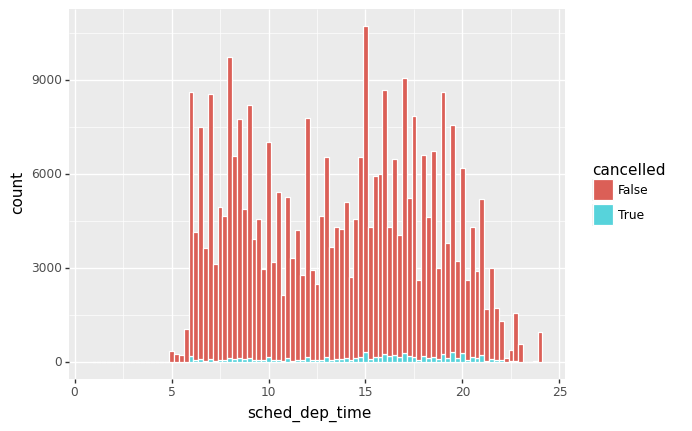

In [154]:
plot = (
    ggplot(pdat, aes(x='sched_dep_time', fill='cancelled'))
    + geom_bar(stat='bin', binwidth=0.25, color='white') 
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este histograma mostra que a quantidade de dados para vôos não cancelados é muito maior que a de vôos cancelados, no entando, dada a diferença de escala, esta comparação não traz grandes informações.

## 7.5.1 A categorical and continuous variable

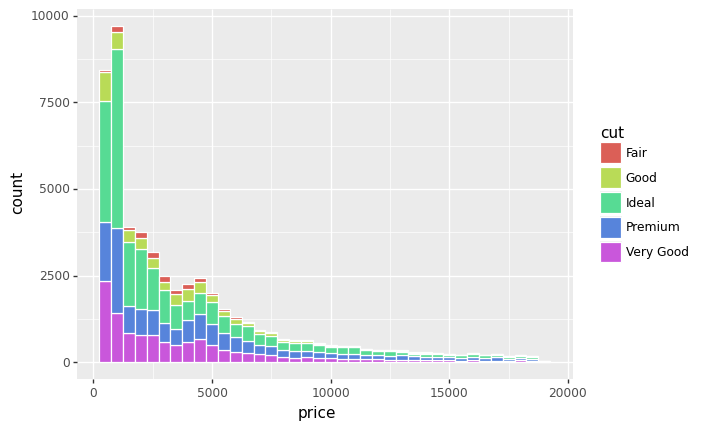

In [160]:
diamonds_aux = diamonds.copy(deep=True)
diamonds_aux['cut'] = pd.Categorical(diamonds_aux['cut'], categories=sorted(diamonds_aux['cut'].unique()), ordered=True)

plot = (
    ggplot(diamonds_aux, aes(x='price', fill='cut'))
    + geom_bar(stat='bin', binwidth=500, color='white')
    + scale_fill_discrete(limits=sorted(diamonds_aux['cut'].unique()))
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este histograma é uma ótima maneira de comparar proporcionalidade de tipos de cortes. Ele deixa evidente que cortes melhores tendem a ser propoorcionalmente mais frequentes em unidades de preços altos.

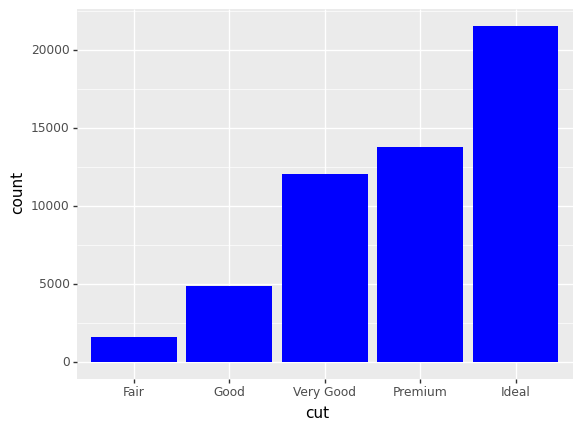

In [167]:
plot = (
    ggplot(diamonds, aes(x='cut'))
    + geom_bar(aes(y='..count..'), fill='blue')  
    + scale_x_discrete(limits=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
)

print(plot)

**INFORMAÇÃO OBTIDA**

Um gráfico semelhante já havia sido plotado anteriormente, e mostrou que cortes melhores são mais frequentes que cortes piores.

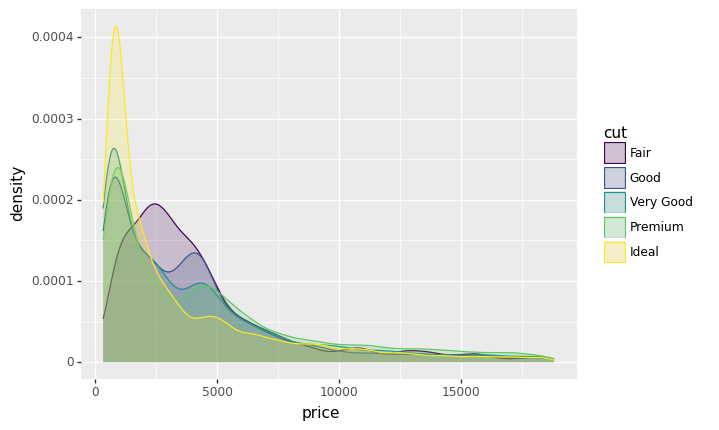

In [170]:
plot = (
    ggplot(diamonds, aes(x='price', fill='cut', color='cut'))
    + geom_density(alpha=0.2)
    )

print(plot)

**INFORMAÇÃO OBTIDA**

O gráfico de distribuições mostra que cotes ideais possuem o maior pico no início, possivelmente por ser a região com maior número de unidades.

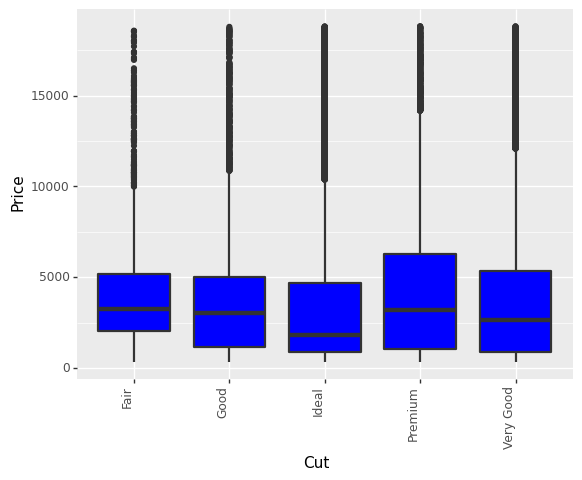

In [185]:
diamonds_aux = diamonds.copy(deep=True)
diamonds_aux['cut'] = pd.Categorical(diamonds_aux['cut'], categories=sorted(diamonds_aux['cut'].unique()), ordered=True)


plot = (ggplot(diamonds_aux, aes(x='cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  # Cor das caixas e bordas
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Para rotacionar os rótulos do eixo x
         + labs(x='Cut', y='Price')  # Rótulos dos eixos
         + scale_fill_discrete(limits=sorted(diamonds_aux['cut'].unique()))
)

print(plot)

**INFORMAÇÃO OBTIDA**

O boxplt mostra que as medianas dos cortes ocupam regiões semelhantes, com os cortes "Premium" ocupando a maior posicão,

In [186]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/mpg/mpg.csv"
mpg = pd.read_csv(url)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


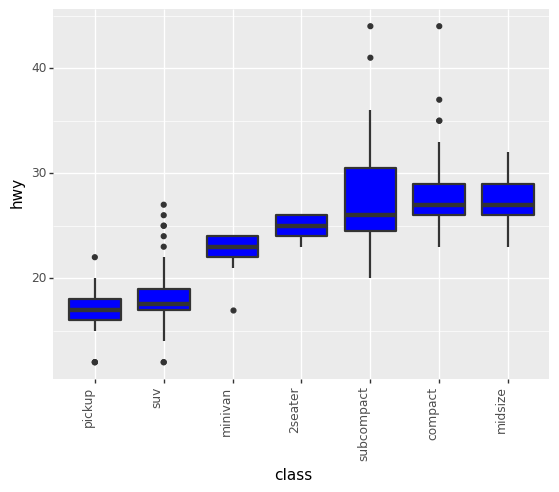

In [300]:
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  # Cor das caixas e bordas
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Para rotacionar os rótulos do eixo x
         + labs(x='class', y='hwy')  # Rótulos dos eixos
)

print(plot)

**INFORMAÇÃO OBTIDA**

O gráfico mostra que veículos subcompactoos são os que aprersentam a maioor variaçao hwy.

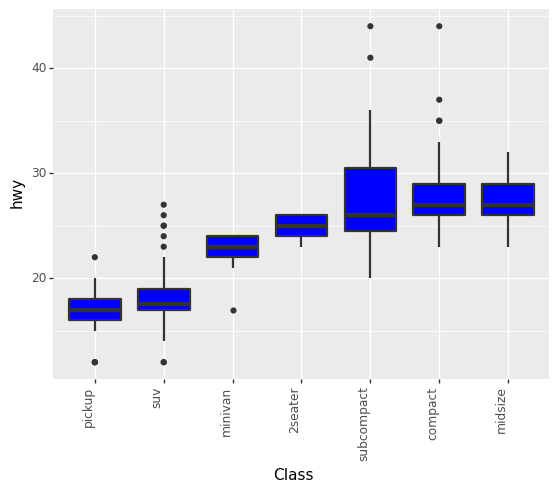

In [299]:
# Reordenar 'class' com base na mediana de 'hwy'
mpg['class'] = pd.Categorical(mpg['class'], 
                              categories=mpg.groupby('class')['hwy'].median().sort_values().index, 
                              ordered=True)

# Criar o plot
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  
         + labs(x='Class', y='hwy')  
)

print(plot)

**INFORMAÇÃO OBTIDA**

O boxplot ordenado traz a ideia de que veículos menores tendem a possuir um maior valor de hwy que veículos maiores. A exemplo disso, na extremidade esqueda, temos pickut, suv e minivan - carros grandes - e na extremidade direita, temos subcompact, compact e midsize.

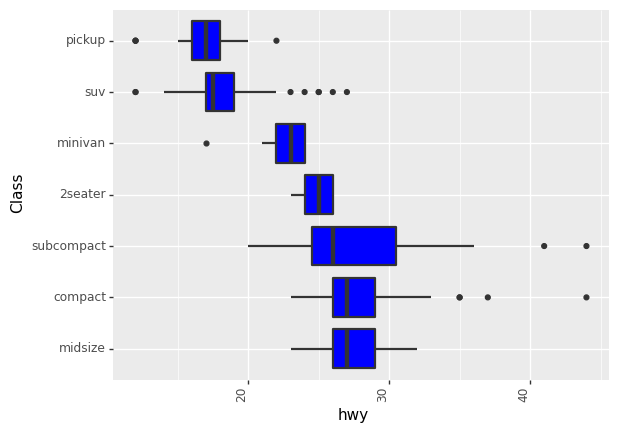

In [301]:
# Reordenar 'class' com base na mediana de 'hwy'
mpg['class'] = pd.Categorical(mpg['class'], 
                              categories=mpg.groupby('class')['hwy'].median().sort_values(ascending=False).index, 
                              ordered=True)

# Criar o plot
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  
         + labs(x='Class', y='hwy')  
         + coord_flip()
         + scale_x_discrete(limits=mpg['class'].cat.categories[::-1])  # Inverter a ordem


)

print(plot)

**INFORMAÇÃO OBTIDA**

As conclusões trazidas neste gráfico são as mesmas dos comentários anteriores, visto que aqui ocorreu apenas uma inversão de eixos.

## 7.5.3 Two continuous variables


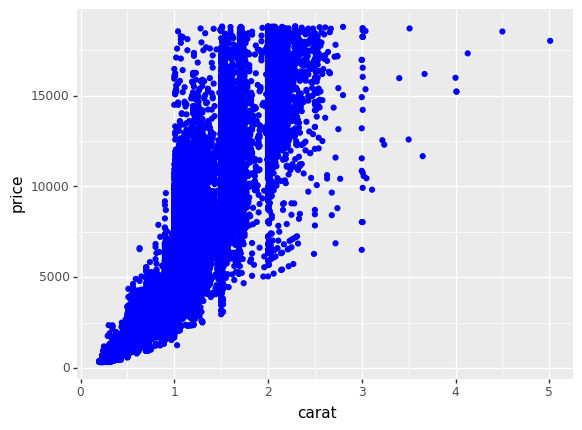

In [210]:
plot = ggplot(diamonds, aes(x="carat", y="price")) + geom_point(color="blue")

print(plot)

**INFORMAÇÃO OBTIDA**

Este scatterplot mostra que a partir de um certo valor de quilate, os pontos começam a ficar mais dispersos e raros.

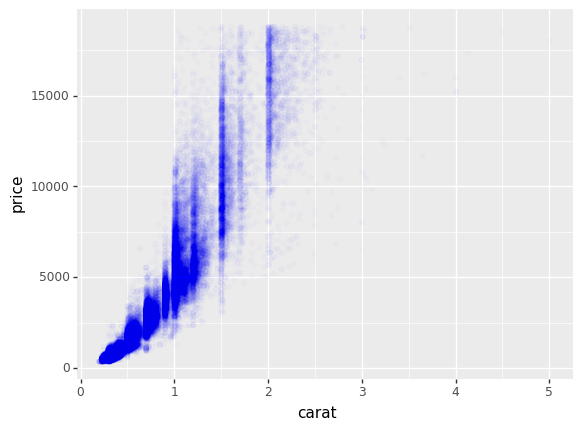

In [212]:
plot = ggplot(diamonds, aes(x="carat", y="price")) + geom_point(color="blue", alpha=0.01)

print(plot)

**INFORMAÇÃO OBTIDA**

Este gráfico torna a leitura do scatterplot mais legível e reforça a ideia da existencia de "clusters" de quilates veriricada anteriormente, quando foram realizados os plots de histograma.

In [213]:
chart_dat = (smaller
    .assign(
      price_cut = lambda x: pd.cut(x.price, 
                        bins = np.arange(0, 20000, step = 1000), 
                        labels = np.arange(0, 19000, step = 1000)), 
      carat_cut = lambda x: pd.cut(x.carat, 
                        bins = np.arange(0, 5.4, step = .2), 
                        labels = np.arange(0, 5.2, step = .2))
      ))
      
chart_dat.head()      


,carat,cut,color,clarity,depth,table,price,x,y,z,price_cut,carat_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0.2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0.2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0.2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0.2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0.2


In [214]:
chart_dat_binned = (chart_dat
    .groupby(['carat_cut', 'price_cut'])
    .size()
    .reset_index(name = 'n'))

chart_dat_binned['n'].replace(to_replace = 0, value = np.nan, inplace = True)

chart_dat_binned.head()    


,carat_cut,price_cut,n
0,0.0,0,12.0
1,0.0,1000,NaN
2,0.0,2000,NaN
3,0.0,3000,NaN
4,0.0,4000,NaN


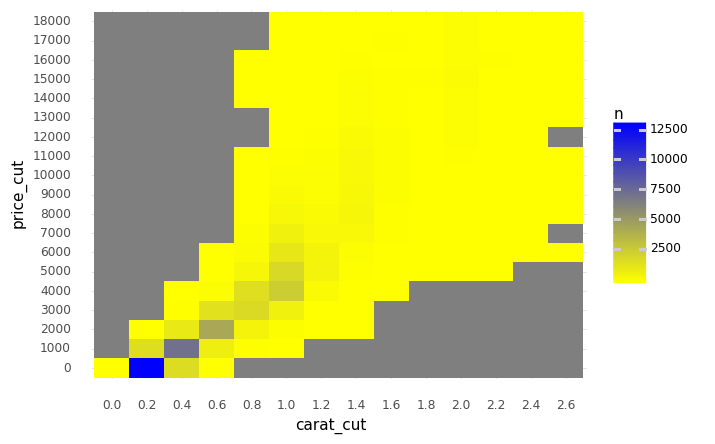

In [231]:
chart_dat_binned_filtered = chart_dat_binned[
    chart_dat_binned["carat_cut"].astype(float) <= 2.8
]


plot = (
    ggplot(chart_dat_binned_filtered, aes(x="carat_cut", y="price_cut", fill="n"))
    + geom_tile()
    + scale_fill_gradient(low="yellow", high="blue")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
    + scale_x_discrete(labels=lambda l: [f"{float(x):.1f}" for x in l])
    + theme_minimal()
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este mapa de calor mostra que existe uma concetração muito grande de diamantes de 0.2 quilates de preço entre 0 e 1000.

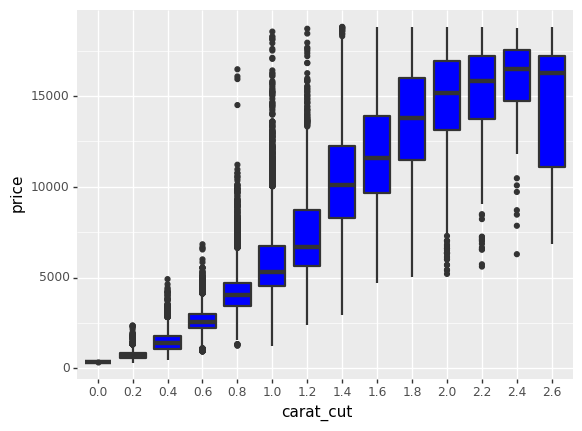

In [233]:
# Criar o plot
plot = (ggplot(chart_dat, aes(x='carat_cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  
         + scale_x_discrete(labels=lambda l: [f"{float(x):.1f}" for x in l])

)

print(plot)

**INFORMAÇÃO OBTIDA**

Este gráfico mostra que conforme o número de quilates aumenta, maior tende ser a variância do preço.

In [234]:
chart_dat = smaller.assign(carat_cut = lambda x: pd.qcut(x.carat,10, labels = False))


In [302]:
chart_dat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


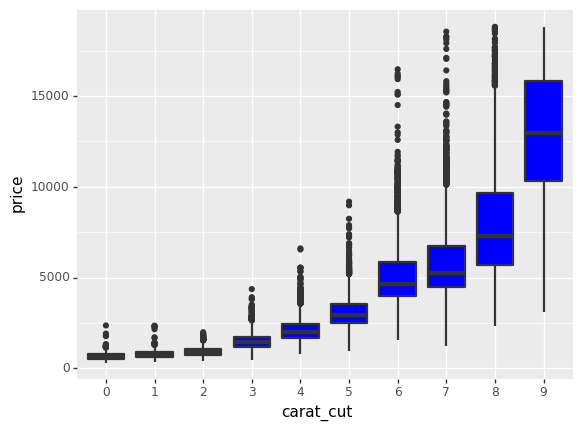

In [238]:
# Converte o carat_cut em um dado categorico
chart_dat['carat_cut'] = pd.Categorical(chart_dat['carat_cut'], 
                                        categories=sorted(chart_dat['carat_cut'].unique()), 
                                        ordered=True)

# Criar o plot
plot = (ggplot(chart_dat, aes(x='carat_cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este gráfico reforça a conclusão obtida no gráfico anterior quanto à variância dos preços para quilates maiores.

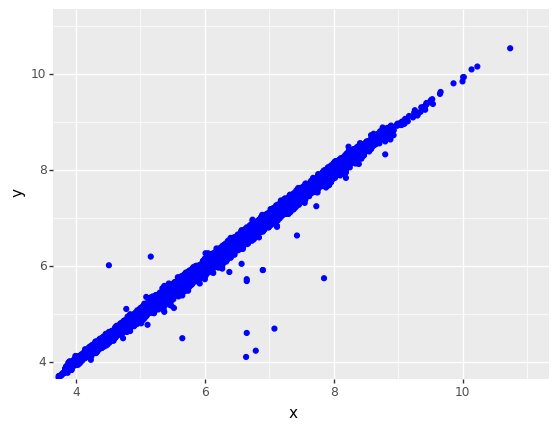

In [241]:
# Substitu os valores NaN ou None por 0

plot = (
    ggplot(diamonds, aes(x="x", y="y"))
    + geom_point(color="blue")
    + coord_cartesian(xlim=(4, 11), ylim=(4, 11))
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este gráfico mostra que existe uma relação linear entre x e y.

## 7.6 Patterns and models

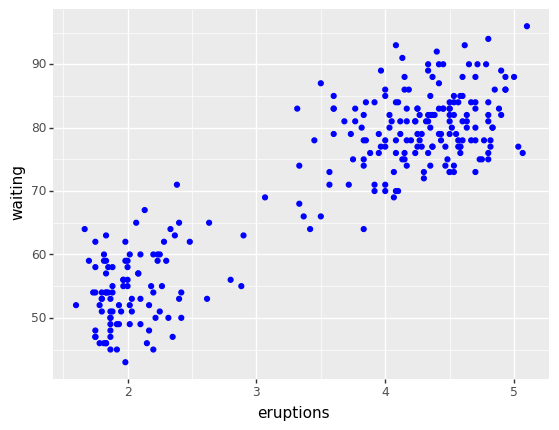

In [243]:
plot = (
    ggplot(faithful, aes(x="eruptions", y="waiting"))
    + geom_point(color="blue")
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este scatterplot mostra que existem 2 "clusters" dada a maior concentração de dados nas extremidades do gráfico, com poucos dados na região central.

In [303]:
import statsmodels.formula.api as smf

mod = smf.ols('np.log(price) ~ np.log(carat)', data = diamonds).fit()

diamonds2 = diamonds.assign(resid = np.exp(mod.resid))

diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,resid
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.819668
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.954656
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.822182
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.569459
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.510767


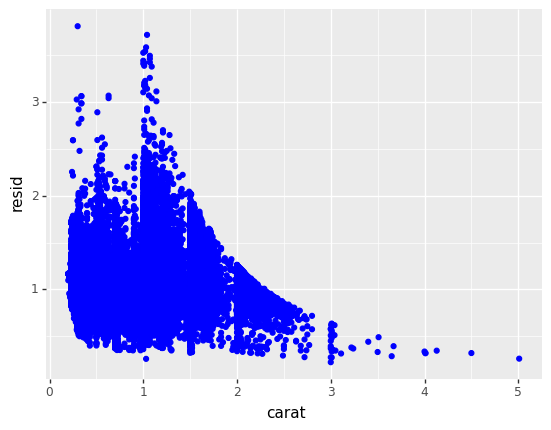

In [245]:
plot = (
    ggplot(diamonds2, aes(x="carat", y="resid"))
    + geom_point(color="blue")
)

print(plot)

**INFORMAÇÃO OBTIDA**

Este gráfico mostra diamantes de maior quilate tendem a apresentar uma quantidade menor de resíduos.

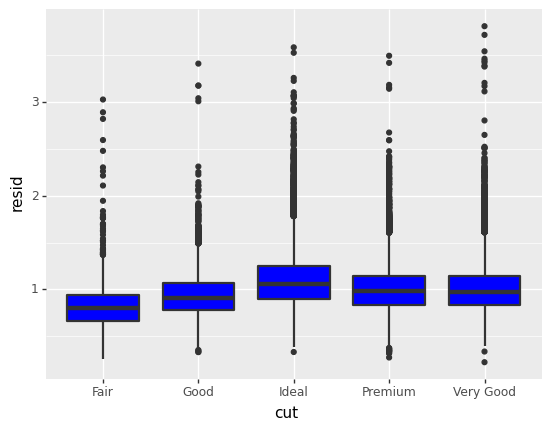

In [304]:
plot = (ggplot(diamonds2, aes(x='cut', y='resid'))
         + geom_boxplot(fill='blue', size=0.9)  
         + scale_x_discrete(limits=sorted(diamonds2["cut"].unique()))
)

print(plot)

**INFORMAÇÃO OBTIDA**

Aqui, fica evidente que os cortes "Ideal" apresentam a maior quantidade de resíduos, possivelmente por conta de sua elevada incidência em diamantes de preço baixo.

# Exercício 3
- Faça todos os exercícios de Learning Check do capítulo 3 deste [link](https://moderndive.com/3-wrangling.html)

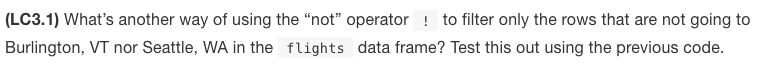

In [250]:
# importa o dataset flights

url = "https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/flights.csv"

flights = pd.read_csv(url)

flights.head()

,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [251]:
# Filtra os dados para voos que não vão para Burlington ou Seattle conforme exemplo do livro
not_BTV_SEA = flights[~((flights['dest'] == "BTV") | (flights['dest'] == "SEA"))]

display(not_BTV_SEA.head())
print("Número de linhas e colunas:", not_BTV_SEA.shape)

,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


Número de linhas e colunas: (330264, 20)


In [252]:
# Realiza a filtragem utilizando uma abordagem diferente
not_BTV_SEA = flights[~flights['dest'].isin(["BTV", "SEA"])]

display(not_BTV_SEA.head())
print("Número de linhas e colunas:", not_BTV_SEA.shape)

,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


Número de linhas e colunas: (330264, 20)


Conforme trecho de código acima, uma maneira de se utilizar o operador not ("!" em R e "~" em Python), é utilizá-lo associado ao método "isin()".

---

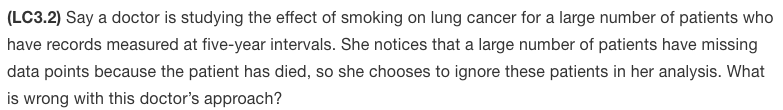

Excluir pacientes que faleceram e que, por isso, têm dados faltantes é um erro conceitual. A morte desses pacientes pode trazer informações valiosas, especialmente em um estudo que analisa o impacto do tabagismo no câncer de pulmão. Ao ignorar esses casos, o médico está correndo o risco de introduzir um viés nos resultados, subestimando os efeitos negativos do tabagismo. A mortalidade associada ao câncer de pulmão é justamente um dos pontos centrais que deveria ser considerado na pesquisa. Portanto, em vez de excluir esses pacientes, seria mais adequado usar técnicas que permitam considerar esses dados, como análises de sobrevivência, que levam em conta o tempo até a morte e ajudam a oferecer uma visão mais completa do impacto do tabagismo.

---


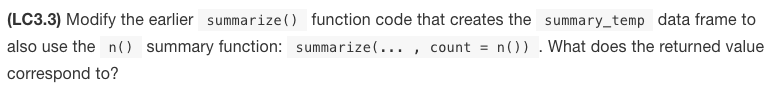

In [253]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/weather.csv"

weather = pd.read_csv(url)  

weather.head()

,rownames,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,2,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,3,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,4,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,5,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [287]:
count = len(weather)
print(count)

26115


O valor retornado corresponde ao número de linhas do dataframe.

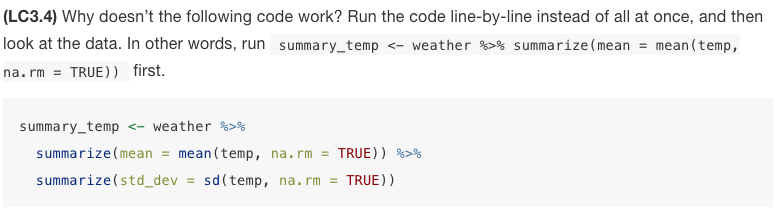

In [289]:
# Código em R convertido para Python

mean_temp = weather['temp'].mean(skipna=True)
summary_temp = pd.DataFrame({'mean': [mean_temp]})
display(summary_temp)
std_dev_temp = weather['temp'].std(skipna=True)
summary_temp = summary_temp.assign(std_dev=std_dev_temp)
display(summary_temp)

,mean
0,55.260392


,mean,std_dev
0,55.260392,17.787852


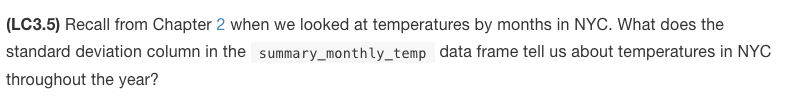

In [254]:
summary_monthly_temp = weather.groupby('month').agg(
    mean=('temp', lambda x: x.mean(skipna=True)),
    std_dev=('temp', lambda x: x.std(skipna=True))
).reset_index()

summary_monthly_temp

,month,mean,std_dev
0,1,35.635660,10.224635
1,2,34.270597,6.982378
2,3,39.880072,6.249278
3,4,51.745642,8.786168
4,5,61.795000,9.681644
5,6,72.184000,7.546371
6,7,80.066221,7.119899
7,8,74.468466,5.191615
8,9,67.371292,8.465902
9,10,60.071130,8.846035


Conforme tabela acima, é possível notar que os meses de final e início do ano (Novembro, Dezembro e Janeiro) são os que apresentam o maior desvio padrão, indicando que são os períodos em que ocorre maior variação de temperatura.

---

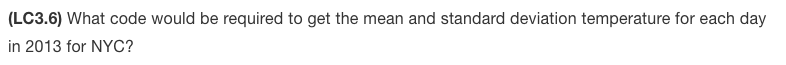

In [257]:
# Segue abaixo o código que calcula a média e o desvio padrão da temperatura por dia

summary_temp_day = weather.groupby(['year', 'month', 'day']).agg(
    mean=('temp', lambda x: x.mean(skipna=True)),
    std_dev=('temp', lambda x: x.std(skipna=True))
).reset_index()

summary_temp_day.head()

,year,month,day,mean,std_dev
0,2013,1,1,36.999701,4.001169
1,2013,1,2,28.702500,3.452051
2,2013,1,3,29.972500,2.584721
3,2013,1,4,34.940000,2.452827
4,2013,1,5,37.205000,4.005004


---


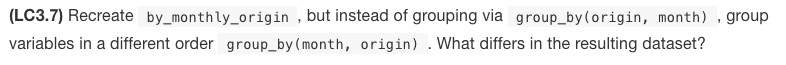


In [260]:
by_monthly_origin = flights.groupby(['month', 'origin']).size().reset_index(name='count')

by_monthly_origin

,month,origin,count
0,1,EWR,9893
1,1,JFK,9161
2,1,LGA,7950
3,2,EWR,9107
4,2,JFK,8421
5,2,LGA,7423
6,3,EWR,10420
7,3,JFK,9697
8,3,LGA,8717
9,4,EWR,10531


A diferença se dá apenas na ordem que em que as linhas são apresentas. No primeiro caso (group_by(origin, month)) as linhas são ordenadas primeiramente pela origem enquanto que no segundo (group_by(month, origin)), a ordenação ocorre primeiramente pelo mês.

---

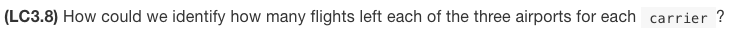

In [263]:
# Segue abaixo o código que calcula o número de voos por aeroporto e companhia aérea

voos_aeroporto = flights.groupby(['origin', 'carrier']).size().reset_index(name='count')

voos_aeroporto

,origin,carrier,count
0,EWR,9E,1268
1,EWR,AA,3487
2,EWR,AS,714
3,EWR,B6,6557
4,EWR,DL,4342
5,EWR,EV,43939
6,EWR,MQ,2276
7,EWR,OO,6
8,EWR,UA,46087
9,EWR,US,4405


---

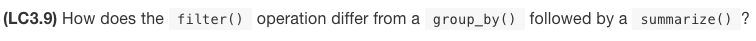

A operação "filter()" apenas seleciona linhas da base de dados utilizada, sem realizar qualquer tipo de cálculo ou modificação, enquanto que a operação "group_by()" realiza calculos através através das linhas filtradas, como por exemplo, calculando um número de ocorrências de um deternimado grupo.

---

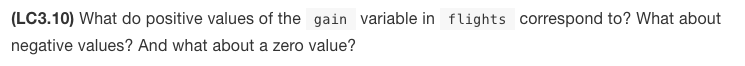

In [265]:
flights = flights.assign(
    gain=flights['dep_delay'] - flights['arr_delay'],
    hours=flights['air_time'] / 60,
    gain_per_hour=lambda x: x['gain'] / x['hours']
)

flights.head()

,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,gain,hours,gain_per_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,-9.0,3.783333,-2.378855
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,-16.0,3.783333,-4.229075
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,-31.0,2.666667,-11.625000
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,17.0,3.050000,5.573770
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,19.0,1.933333,9.827586


Um valor positivo de gain implica que o atraso na saída é maior que o atraso na chegada, indicando que o tempo total de vôo foi menor que o programado. Um valor negativo implica o contrário - o tempo total de vôo foi maior. Um ganho 0 significa que o tempo de vôo planejado foi cumprido.

---

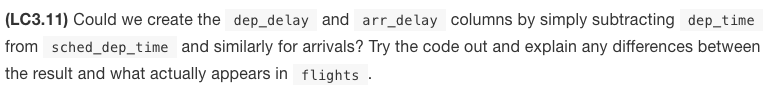

A simples subtração de 'dep_time' e 'sched_dep_time' não seria suficiente porque estas colunas estão tipadas como números inteiros. Por exemplo, o valor 1200 equivale a 12:00. Para que a subtração faça sentido, seria necessário que estas colunas estivessem no formato datetime. Aqui a data também é importante para considerar casos em que os vôos ocorrem ao longo de dias distintos, por exemplo começando às 23:00 de um dia e terminando às 00:30 de outro.

---

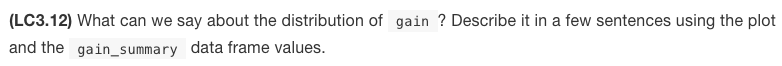

,gain,hours,gain_per_hour
count,327346.000000,327346.000000,327346.000000
mean,5.659779,2.511441,3.261340
std,18.043648,1.561472,11.199083
min,-196.000000,0.333333,-197.419355
25%,-3.000000,1.366667,-1.363636
50%,7.000000,2.150000,3.272727
75%,17.000000,3.200000,8.181818
max,109.000000,11.583333,108.461538


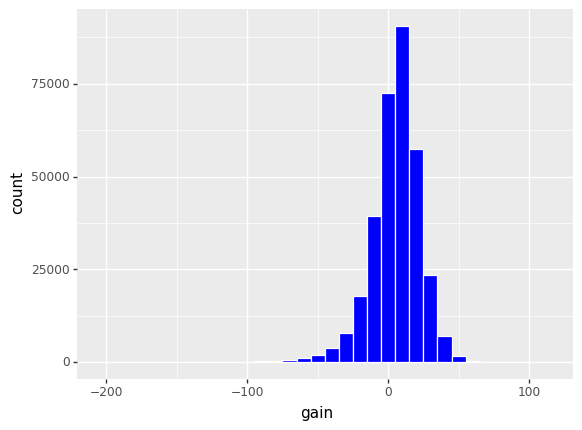

In [270]:
df_gain = flights[['gain', 'hours', 'gain_per_hour']]

display(df_gain.describe())

# Plota a distribuiçao de gain

plot = (
    ggplot(flights, aes(x='gain'))
    + geom_histogram(binwidth=10, fill='blue', color='white')
)

print(plot)

Obserivando o histograma e a tabela de descrição das estatísticas de gain, pode-se dizer que a maior parte dos ganhos são positivos - a média é 5.66 e a mediana é 7, mostrando que no geral os vôos são mais rápidos que o planejado mas ainda assim ocorrem casos de ganhos muito positivos ou muito negativos.

---

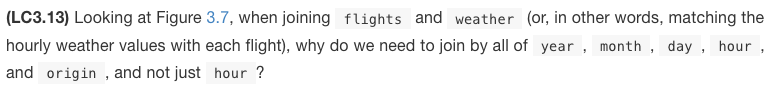

É importante considerar todas essas colunas ao realizar o join, porque a hora é um valor compartilhado por todos os dias. Se considerássemos apenas as horas, dados de dias diferentes seriam combinados, o que é conceitualmente incorreto para os objetivos da operação em questão. Aqui é necessário saber qual o ano, mês, dia, hora e local (aeroporto) para realizar o join.

---

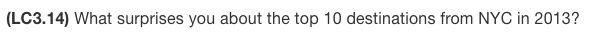

Segue abaixo a tabela com os 10 maiores destinos de vôos de NYC:

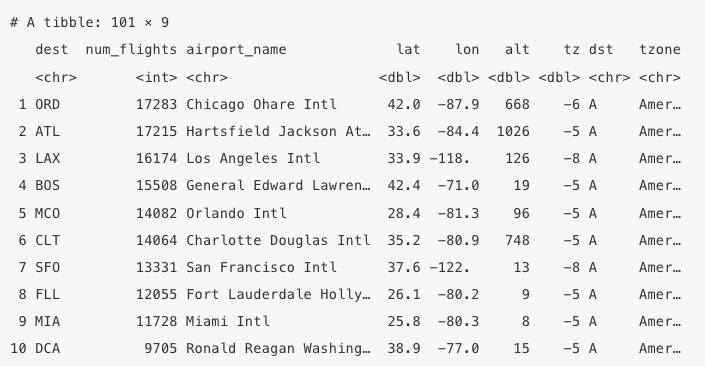

Um detalhe que me chama atenção é o fato de Miami e Orlando estarem nessa lista, mesmo sendo locais muito próximos, mostrandno que a Flórida é um destino bem comum.

---

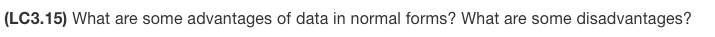

A grande vantagem de dados em forma normal é que eles evitam redundânica de informação, fazendo com que ocupem menos espaço de armazenamento e facilitando a operação de join com outras tabelas. A desvantagem é que para obter uma determinada informação, pode ser que seja necessário realizar uma ou mais operações de join.

---

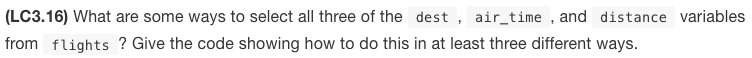

In [272]:
# Primeira maneira
df_selected = flights[['dest', 'air_time', 'distance']]

df_selected.head()

,dest,air_time,distance
0,IAH,227.0,1400
1,IAH,227.0,1416
2,MIA,160.0,1089
3,BQN,183.0,1576
4,ATL,116.0,762


In [277]:
# Segunda maneira
df_selected = flights.iloc[:, 14:17]

df_selected.head()

,dest,air_time,distance
0,IAH,227.0,1400
1,IAH,227.0,1416
2,MIA,160.0,1089
3,BQN,183.0,1576
4,ATL,116.0,762


In [279]:
# Terceira maneira
df_selected = flights.loc[:, 'dest':'distance']

df_selected.head()

,dest,air_time,distance
0,IAH,227.0,1400
1,IAH,227.0,1416
2,MIA,160.0,1089
3,BQN,183.0,1576
4,ATL,116.0,762


---

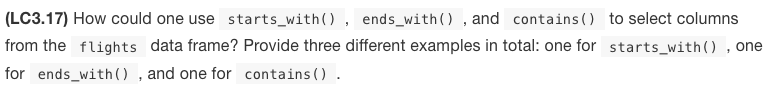

Os exemplos abaixo serão baseados na coluna 'distance'.

In [282]:
# Usando startswith
df_selected = flights.loc[:, flights.columns.str.startswith('dis')]

df_selected.head()

,distance
0,1400
1,1416
2,1089
3,1576
4,762


In [283]:
# Usando endswith
df_selected = flights.loc[:, flights.columns.str.endswith('ance')]

df_selected.head()

,distance
0,1400
1,1416
2,1089
3,1576
4,762


In [284]:
# Usando contains
df_selected = flights.loc[:, flights.columns.str.contains('anc')]

df_selected.head()

,distance
0,1400
1,1416
2,1089
3,1576
4,762


---

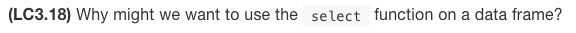

A função select() (em R) é utilizada quand se deseja trabalhar com um conjunto específico de colunas dentro de um dataframe, removendo dados desnecessários e deixando a sua visualização mais legível. É especialmente útil em conjuntos com um número muito grande de colunas.

---

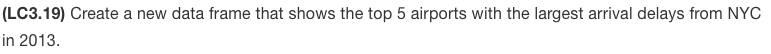

In [286]:
best_5 = flights.groupby('dest').agg(
    avg_delay=('arr_delay', lambda x: x.mean(skipna=True))
).reset_index().sort_values(by='avg_delay', ascending=False).head(5)

display(best_5)

,dest,avg_delay
18,CAE,41.764151
101,TUL,33.659864
67,OKC,30.619048
46,JAC,28.095238
103,TYS,24.069204


---

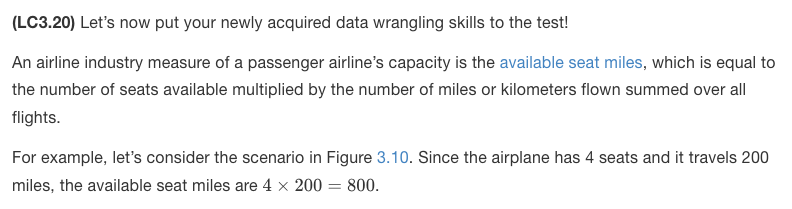

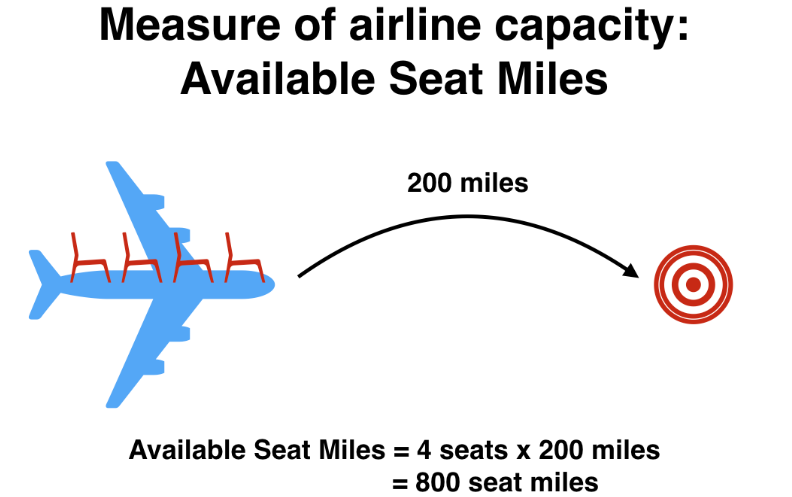

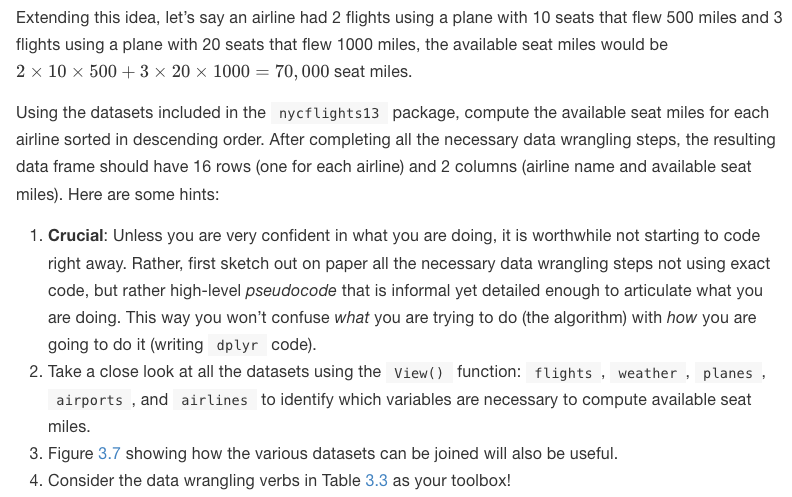

In [292]:
# Baixa dependencias
planes_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/planes.csv'
planes = pd.read_csv(planes_url)

airports_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/airports.csv'
airports = pd.read_csv(airports_url)

airlines_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/airlines.csv'
airlines = pd.read_csv(airlines_url)

flights_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/flights.csv'
flights = pd.read_csv(flights_url)

weather_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/weather.csv'
weather = pd.read_csv(weather_url)

display(planes.head())
display(airports.head())
display(airlines.head())
display(flights.head())
display(weather.head())



,rownames,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,3,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,4,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


,rownames,faa,name,lat,lon,alt,tz,dst,tzone
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


,rownames,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.


,rownames,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


,rownames,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,2,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,3,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,4,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,5,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [296]:
# Realizando o inner join entre flights e planes com base em "tailnum"
merged_data = flights.merge(planes, on='tailnum', how='inner')

# Selecionando as colunas relevantes
selected_data = merged_data[['carrier', 'seats', 'distance']]

# Calculando ASM
selected_data = selected_data.assign(ASM=selected_data['seats'] * selected_data['distance'])

# Agrupando por carrier e somando ASM
summary_asm = selected_data.groupby('carrier').agg(
    ASM=('ASM', lambda x: x.sum(skipna=True))
).reset_index()

# Ordenando por ASM em ordem decrescente
summary_asm = summary_asm.sort_values(by='ASM', ascending=False)

# Realizando o inner join entre o resumo ASM e airlines com base em "carrier"
final_result = summary_asm.merge(airlines, on='carrier', how='inner')

final_result

,carrier,ASM,rownames,name
0,UA,15516377526,12,United Air Lines Inc.
1,DL,10532885801,5,Delta Air Lines Inc.
2,B6,9618222135,4,JetBlue Airways
3,AA,3677292231,2,American Airlines Inc.
4,US,2533505829,13,US Airways Inc.
5,VX,2296680778,14,Virgin America
6,EV,1817236275,6,ExpressJet Airlines Inc.
7,WN,1718116857,15,Southwest Airlines Co.
8,9E,776970310,1,Endeavor Air Inc.
9,HA,642478122,9,Hawaiian Airlines Inc.
